In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
#we can see that there are no null values

Column names and descriptions
-age - age in years
-sex - (1 = male; 0 = female)
-cp - chest pain type-----> Value 1: typical angina Value 2: atypical angina Value 3: non-anginal pain Value 4: asymptomatic
-trestbps - resting blood pressure (in mm Hg on admission to the hospital)
-chol - serum cholestoral in mg/dl
-fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
-restecg - resting electrocardiographic results
-thalach - maximum heart rate achieved
-exang - exercise induced angina (1 = yes; 0 = no)
-oldpeak - ST depression induced by exercise relative to rest
-slope - the slope of the peak exercise ST segment
-ca - number of major vessels (0-3) colored by flourosopy
-thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
-target - have disease or not (1=yes, 0=no)

In [5]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

we can see that the target column is slightly imbalanced. We can ignore this amount of imbalance

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


we can see that the median value for most of the features is very close to the mean value. so we can conclude that the data in each feature is normall distributed and does not have any kind of skewness (or to be precise, very minutely skewed)

**Let us now try to bring some insights out the available data**

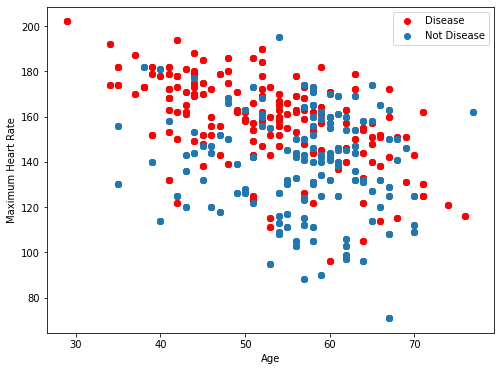

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

We can see that as the Heart rate increases, the patient is more to be having heart related disease

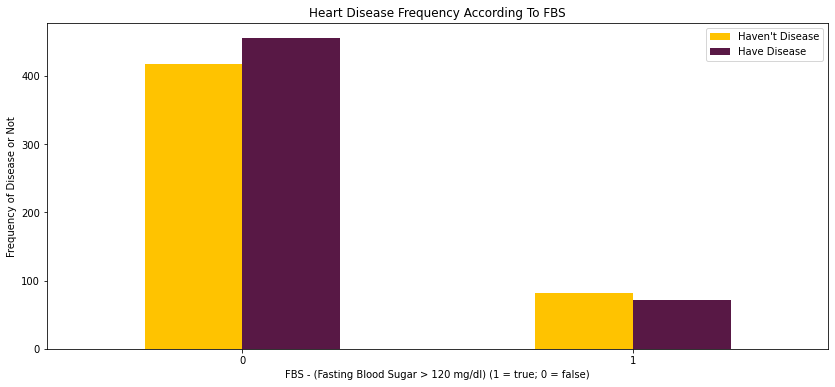

In [8]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(14,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

It is shocking to see that the population with controlled sugar levels are more prone to heart related diseases as compared to population with diabetes. Maybe, this is because once a person is diagnosed with diabetes, he/she controls the food consumption and starts exercising more regularly and focusses on eating healthy food.

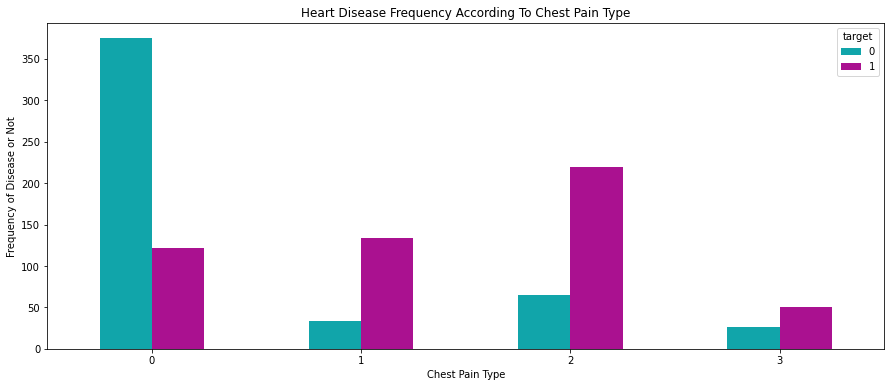

In [9]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

People with chest pain of type: 1,2,3 are highly prone to heart related diseases

In [10]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


the pair plot was fairly big to conclude any points. So, checking the correlation value was easier to conclude the impact of each feature on the target.

In [18]:
#splitting into x and y
x = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

In [19]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [20]:
xtrain

array([[57.,  1.,  0., ...,  2.,  0.,  3.],
       [59.,  1.,  3., ...,  2.,  2.,  2.],
       [62.,  0.,  0., ...,  1.,  0.,  2.],
       ...,
       [56.,  1.,  0., ...,  1.,  1.,  2.],
       [62.,  1.,  0., ...,  1.,  2.,  3.],
       [64.,  1.,  3., ...,  1.,  0.,  3.]])

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)

xtest = sc.transform(xtest)

In [23]:
import tensorflow as tf
from tensorflow.keras import Sequential # it is used to build ANN
from tensorflow.keras.layers import Dense # it is used to add hidden layers
from sklearn.metrics import classification_report # for evaluation

In [25]:
# STEP 1: Initiate the model
ann = Sequential()

# STEP 2: add layers into the model
ann.add(Dense(units=16, activation="relu")) # Created one hidden layer
ann.add(Dense(units=4, activation="relu")) # Created second hidden layer
ann.add(Dense(units=1, activation="sigmoid"))

# STEP 3: establish connection between the layers
ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# STEP 4: train the model
ann.fit(xtrain, ytrain, batch_size=30, epochs=100)

# STEP 5: make prediction
ypred = ann.predict(xtest)

Epoch 1/100
28/28 [==============================] - 1s 2ms/step - loss: 0.6778 - accuracy: 0.5915
Epoch 2/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5862 - accuracy: 0.6683
Epoch 3/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5295 - accuracy: 0.7305
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4856 - accuracy: 0.7707
Epoch 5/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4521 - accuracy: 0.7780
Epoch 6/100
28/28 [==============================] - 0s 3ms/step - loss: 0.4274 - accuracy: 0.7878
Epoch 7/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.8012
Epoch 8/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3964 - accuracy: 0.8061
Epoch 9/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3857 - accuracy: 0.8098
Epoch 10/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3767 - accuracy: 0.8085
Epoch 11/

In [26]:
# step-6: set the threshold
ypred = np.where(ypred<0.5, 0, 1)

In [ ]:
ypred

In [28]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       109
           1       0.97      0.96      0.96        96

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



**checking the accuracy with Logistic regression**

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain, ytrain)
ypred_lr = lr.predict(xtest)

In [30]:
print(classification_report(ytest, ypred_lr))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80       109
           1       0.75      0.90      0.82        96

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



In [31]:
# we can see that, in this particular case study, ANN gives 
# better results as compared to Logistic regression